# Digits MNINST Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


## 1.  Load MNIST

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# These are all pandas DataFrames
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

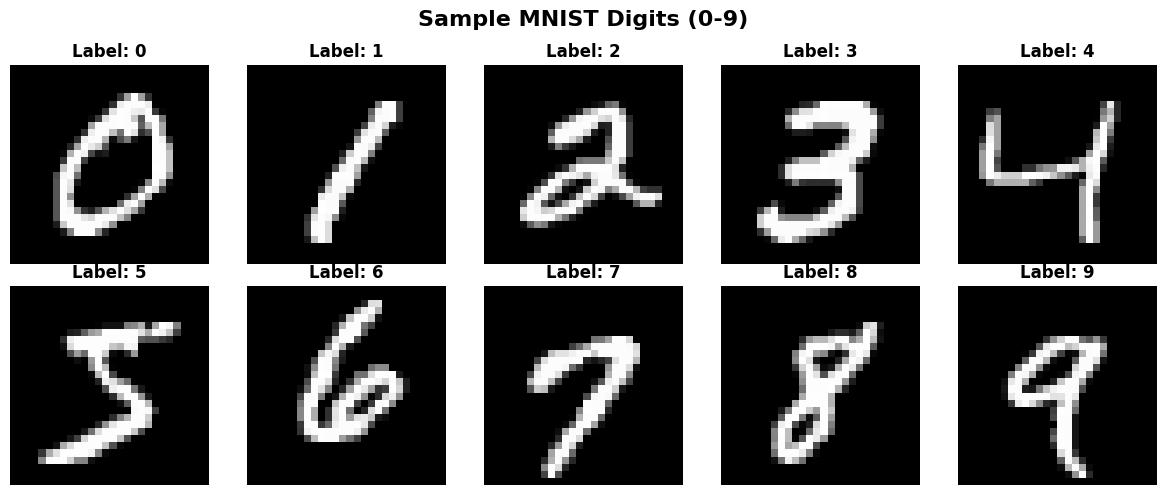

In [6]:
# Display a grid of sample digits
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits (0-9)', fontsize=16, fontweight='bold')

# Show one example of each digit (0-9)
for digit in range(10):
    # Find the first occurrence of each digit
    idx = None
    for i in range(len(y_train)):
        if y_train[i] == digit:
            idx = i
            break
    
    if idx is not None:
        row = digit // 5
        col = digit % 5
        axes[row, col].imshow(x_train[idx], cmap='gray')
        axes[row, col].set_title(f'Label: {digit}', fontsize=12, fontweight='bold')
        axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [11]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [12]:
print("Train after reshape:", x_train.shape)
print("Test after reshape:", x_test.shape)

Train after reshape: (60000, 784)
Test after reshape: (10000, 784)


## 2. Build a MLP


Below is a simple diagram of the MLP we build in the next cell. Each arrow represents a fully connected layer.

```mermaid
flowchart LR
    I([Input 28x28 = 784]) --> D1[Dense 128 + ReLU]
    D1 --> D2[Dense 64 + ReLU]
    D2 --> O[Dense 10 + Softmax]
```

If your Jupyter environment does not render Mermaid, read it left-to-right as:
`Input(784) → Dense(128, ReLU) → Dense(64, ReLU) → Dense(10, Softmax)`

In [ ]:
def build_mlp(activation="relu"):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28 * 28,)),
        tf.keras.layers.Dense(128, activation=activation),
        tf.keras.layers.Dense(64, activation=activation),
        tf.keras.layers.Dense(10, activation="softmax"),
    ])
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

## 3.  Training a NN

In [14]:
model_relu = build_mlp("relu")
model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Track training time
start_time = time.time()
history_relu = model_relu.fit(
    x_train,
    y_train,
    validation_split=0.1,
    epochs=15,  # Increased from 5 to allow model to converge
    batch_size=128,
    verbose=2,
)
training_time = time.time() - start_time

Epoch 1/15
422/422 - 1s - 3ms/step - accuracy: 0.8946 - loss: 0.3687 - val_accuracy: 0.9593 - val_loss: 0.1446
Epoch 2/15
422/422 - 1s - 2ms/step - accuracy: 0.9564 - loss: 0.1483 - val_accuracy: 0.9710 - val_loss: 0.1030
Epoch 3/15
422/422 - 1s - 2ms/step - accuracy: 0.9703 - loss: 0.1011 - val_accuracy: 0.9757 - val_loss: 0.0858
Epoch 4/15
422/422 - 1s - 2ms/step - accuracy: 0.9776 - loss: 0.0763 - val_accuracy: 0.9750 - val_loss: 0.0839
Epoch 5/15
422/422 - 1s - 2ms/step - accuracy: 0.9816 - loss: 0.0594 - val_accuracy: 0.9772 - val_loss: 0.0746
Epoch 6/15
422/422 - 1s - 2ms/step - accuracy: 0.9855 - loss: 0.0472 - val_accuracy: 0.9788 - val_loss: 0.0696
Epoch 7/15
422/422 - 1s - 2ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9725 - val_loss: 0.0947
Epoch 8/15
422/422 - 1s - 2ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9800 - val_loss: 0.0697
Epoch 9/15
422/422 - 1s - 2ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9748 - val_loss: 0.0881
E

## 4.  Visualize training

In [18]:
# Helper function to get and format parameter count
def get_param_count(model):
    """Calculate and return total trainable parameters in a model."""
    total_params = model.count_params()
    trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
    non_trainable_params = total_params - trainable_params
    
    # Format for readability
    if total_params >= 1_000_000:
        total_str = f"{total_params/1_000_000:.2f}M"
    elif total_params >= 1_000:
        total_str = f"{total_params/1_000:.2f}K"
    else:
        total_str = str(total_params)
    
    return total_params, trainable_params, non_trainable_params, total_str

# Custom callback to evaluate on test set after each epoch
class TestSetEvaluationCallback(tf.keras.callbacks.Callback):
    def __init__(self, test_data):
        super().__init__()
        self.test_data = test_data
        self.test_loss = []
        self.test_accuracy = []
    
    def on_epoch_end(self, epoch, logs=None):
        test_loss, test_acc = self.model.evaluate(
            self.test_data[0], self.test_data[1], 
            verbose=0
        )
        self.test_loss.append(test_loss)
        self.test_accuracy.append(test_acc)
        print(f"  Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

In [20]:
activations = ["relu", "tanh", "sigmoid"]
results = {}
histories = {}
test_callbacks = {}
training_times = {}
eval_times = {}
param_counts = {}

for act in activations:
    model = build_mlp(act)
    
    # Get parameter count (all models have same architecture, so same param count)
    total_params, trainable_params, non_trainable_params, total_str = get_param_count(model)
    param_counts[act] = {'total': total_params, 'formatted': total_str}
    
    # Create callback to track test set performance after each epoch
    test_callback = TestSetEvaluationCallback((x_test, y_test))
    
    # Track training time
    start_time = time.time()
    history = model.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=15,  # Increased from 5 to allow models to converge
        batch_size=128,
        verbose=0,
        callbacks=[test_callback],
    )
    train_time = time.time() - start_time
    
    # Track evaluation time
    eval_start = time.time()
    test_loss_act, acc = model.evaluate(x_test, y_test, verbose=0)
    eval_time = time.time() - eval_start
    
    results[act] = {'accuracy': acc, 'loss': test_loss_act}
    histories[act] = history
    test_callbacks[act] = test_callback
    training_times[act] = train_time
    eval_times[act] = eval_time

print("Activation Function Comparison:")
print("="*60)
print(f"Model Architecture: 784 → 128 → 64 → 10")
print(f"Total Parameters:   {param_counts[activations[0]]['total']:,} ({param_counts[activations[0]]['formatted']})")
print(f"Parameters/sample:   {param_counts[activations[0]]['total']/len(x_train):.2f}")
print("-"*60)
for act in activations:
    print(f"{act:7s} test accuracy: {results[act]['accuracy']:.4f} | "
          f"test loss: {results[act]['loss']:.4f} | "
          f"train time: {training_times[act]:.2f}s")
print("="*60)

  Test accuracy: 0.9518, Test loss: 0.1640
  Test accuracy: 0.9660, Test loss: 0.1183
  Test accuracy: 0.9691, Test loss: 0.1019
  Test accuracy: 0.9735, Test loss: 0.0852
  Test accuracy: 0.9730, Test loss: 0.0856
  Test accuracy: 0.9761, Test loss: 0.0766
  Test accuracy: 0.9774, Test loss: 0.0768
  Test accuracy: 0.9757, Test loss: 0.0775
  Test accuracy: 0.9755, Test loss: 0.0831
  Test accuracy: 0.9737, Test loss: 0.0919
  Test accuracy: 0.9732, Test loss: 0.0938
  Test accuracy: 0.9773, Test loss: 0.0850
  Test accuracy: 0.9770, Test loss: 0.0834
  Test accuracy: 0.9725, Test loss: 0.1065
  Test accuracy: 0.9759, Test loss: 0.1001
  Test accuracy: 0.9403, Test loss: 0.2084
  Test accuracy: 0.9562, Test loss: 0.1447
  Test accuracy: 0.9649, Test loss: 0.1183
  Test accuracy: 0.9688, Test loss: 0.1028
  Test accuracy: 0.9697, Test loss: 0.0971
  Test accuracy: 0.9728, Test loss: 0.0891
  Test accuracy: 0.9741, Test loss: 0.0824
  Test accuracy: 0.9766, Test loss: 0.0815
  Test accu

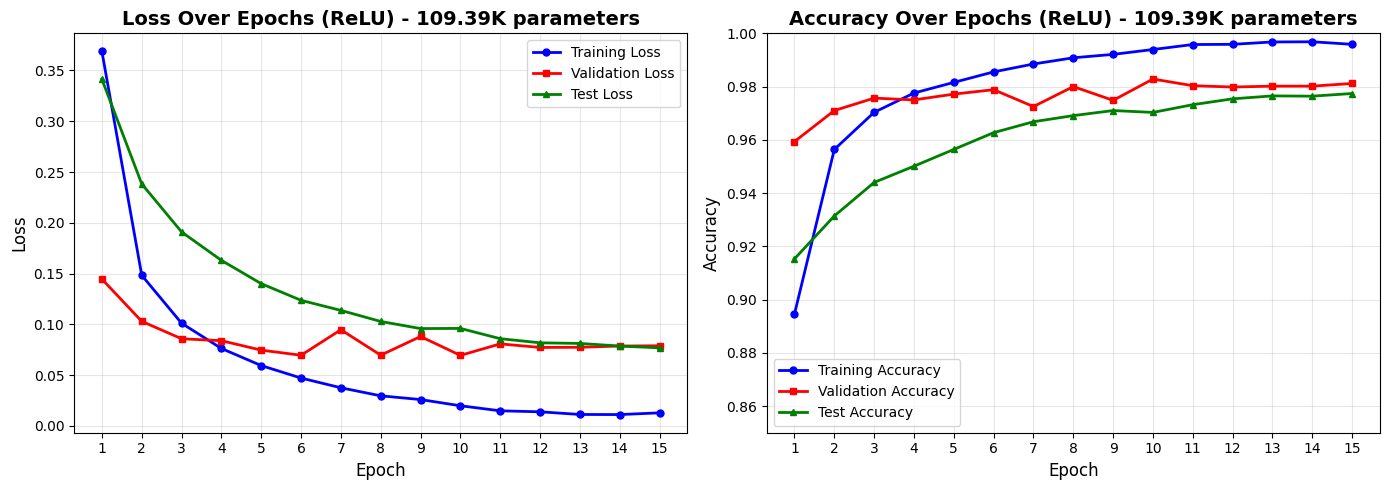


TRAINING SUMMARY
Model Parameters:      109,386 (109.39K)
Parameters/sample:     1.82

Final Training Loss:   0.0129
Final Validation Loss: 0.0789
Final Test Loss:       0.0769

Final Training Accuracy:   0.9959
Final Validation Accuracy: 0.9812
Final Test Accuracy:       0.9774

Training Time:    10.96s (0.18 min)
Evaluation Time:  0.17s
Total Time:       11.13s (0.19 min)


In [21]:
# Create comprehensive visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

epochs = range(1, len(history_relu.history['loss']) + 1)

# Get parameter count for display in plots
total_params, trainable_params, non_trainable_params, total_str = get_param_count(model_relu)

# Plot 1: Loss over epochs
axes[0].plot(epochs, history_relu.history['loss'], 'b-o', label='Training Loss', linewidth=2, markersize=5)
axes[0].plot(epochs, history_relu.history['val_loss'], 'r-s', label='Validation Loss', linewidth=2, markersize=5)
axes[0].plot(epochs, test_callback.test_loss, 'g-^', label='Test Loss', linewidth=2, markersize=5)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
# Add parameter count to title
title_with_params = f'Loss Over Epochs (ReLU) - {total_str} parameters'
axes[0].set_title(title_with_params, fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(epochs)

# Plot 2: Accuracy over epochs
axes[1].plot(epochs, history_relu.history['accuracy'], 'b-o', label='Training Accuracy', linewidth=2, markersize=5)
axes[1].plot(epochs, history_relu.history['val_accuracy'], 'r-s', label='Validation Accuracy', linewidth=2, markersize=5)
axes[1].plot(epochs, test_callback.test_accuracy, 'g-^', label='Test Accuracy', linewidth=2, markersize=5)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
# Add parameter count to title
title_with_params = f'Accuracy Over Epochs (ReLU) - {total_str} parameters'
axes[1].set_title(title_with_params, fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(epochs)
axes[1].set_ylim([0.85, 1.0])

plt.tight_layout()
plt.show()

# Get parameter count for display (already calculated above for plot titles)

# Print summary statistics
print("\n" + "="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Model Parameters:      {total_params:,} ({total_str})")
print(f"Parameters/sample:     {total_params/len(x_train):.2f}")
print(f"\nFinal Training Loss:   {history_relu.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history_relu.history['val_loss'][-1]:.4f}")
print(f"Final Test Loss:       {test_callback.test_loss[-1]:.4f}")
print(f"\nFinal Training Accuracy:   {history_relu.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history_relu.history['val_accuracy'][-1]:.4f}")
print(f"Final Test Accuracy:       {test_callback.test_accuracy[-1]:.4f}")
print(f"\nTraining Time:    {training_time:.2f}s ({training_time/60:.2f} min)")
print(f"Evaluation Time:  {eval_time:.2f}s")
print(f"Total Time:       {training_time + eval_time:.2f}s ({(training_time + eval_time)/60:.2f} min)")
print("="*60)